# Import Libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
# to show the image inline
% matplotlib inline 

print("testing file without space in its name")

testing file without space in its name


# Torchvision

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Training Images

 ship  frog  deer   car


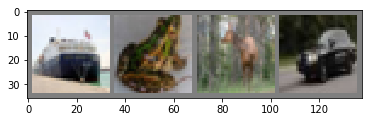

In [25]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Neural Net declaration

In [39]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # in channels of 3, out channels of 6, kernel size of 5
        self.conv1 = nn.Conv2d(3,6,5)
        # kernel size of 2 and stride of 2
        self.pool = nn.MaxPool2d(2,2)
        # in channels of 6, out channels of 16, kernel size of 5
        self.conv2 = nn.Conv2d(6,16,5)
        # in_features, out_features
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

# Loss Function

In [40]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

# Training

In [41]:
for epoch in range(2):
    print(epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

        

0
[1,  2000] loss: 2.121
[1,  4000] loss: 1.774
[1,  6000] loss: 1.638
[1,  8000] loss: 1.538
[1, 10000] loss: 1.494
[1, 12000] loss: 1.460
1
[2,  2000] loss: 1.387
[2,  4000] loss: 1.402
[2,  6000] loss: 1.363
[2,  8000] loss: 1.325
[2, 10000] loss: 1.320
[2, 12000] loss: 1.294
Finished Training


# Testing

GroundtTruth:    cat  ship  ship plane


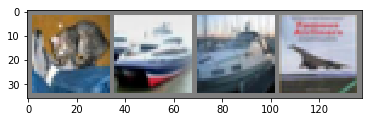

In [28]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundtTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [ ]:
outputs = net(Variable(images))

In [32]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  truck   cat   dog  deer


In [34]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images : %d %%' % (100 * correct/ total))

Accuracy of the network on the 10000 test images : 60 %


In [35]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 68 %
Accuracy of  bird : 47 %
Accuracy of   cat : 58 %
Accuracy of  deer : 54 %
Accuracy of   dog : 39 %
Accuracy of  frog : 65 %
Accuracy of horse : 64 %
Accuracy of  ship : 83 %
Accuracy of truck : 59 %
